# 1. K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_coord = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
       83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27,
       17, 17]
y_coord = [  4,   6,   0,   0,   4,   3,   1,   6,   5,   4,   6,  10,   8,
        10,  97,  94,  99,  95,  95,  97,  99,  99,  94,  99,  90,  98,
       100,  93,  98,  15,  10,   0,  10,   7,  17,  15]
x_scaled = [0.50934905, 0.59923418, 1.04865981, 0.41946392, 1.10858323,
       0.98873639, 0.41946392, 0.89885127, 1.04865981, 0.50934905,
       0.3295788 , 0.62919589, 0.38950222, 0.29961709, 2.42689842,
       2.51678354, 2.60666867, 2.48682183, 2.6965538 , 2.90628576,
       2.81640063, 2.63663038, 2.66659209, 2.78643892, 2.75647721,
       2.45686013, 2.42689842, 2.75647721, 2.72651551, 0.65915759,
       0.6891193 , 0.74904272, 0.74904272, 0.80896614, 0.50934905,
       0.50934905]

y_scaled = [0.09000985, 0.13501477, 0.        , 0.        , 0.09000985,
       0.06750738, 0.02250246, 0.13501477, 0.11251231, 0.09000985,
       0.13501477, 0.22502461, 0.18001969, 0.22502461, 2.18273875,
       2.11523137, 2.22774367, 2.13773383, 2.13773383, 2.18273875,
       2.22774367, 2.22774367, 2.11523137, 2.22774367, 2.02522152,
       2.20524121, 2.25024613, 2.0927289 , 2.20524121, 0.33753692,
       0.22502461, 0.        , 0.22502461, 0.15751723, 0.38254184,
       0.33753692]
comic_con = pd.DataFrame()
comic_con["x_coordinate"] = x_coord
comic_con["y_coordinate"] = y_coord
comic_con["x_scaled"] = x_scaled
comic_con["y_scaled"] = y_scaled

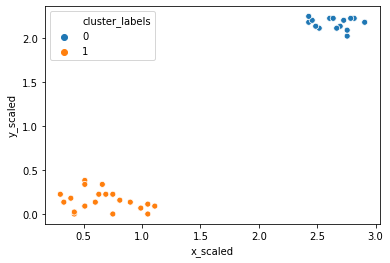

In [6]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[["x_scaled","y_scaled"]],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[["x_scaled","y_scaled"]],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# 2. Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

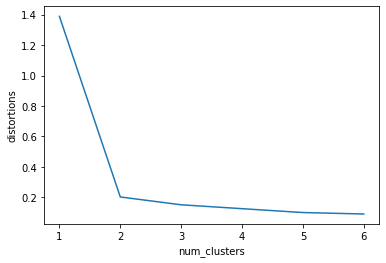

In [7]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[["x_scaled","y_scaled"]],i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# 3. Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

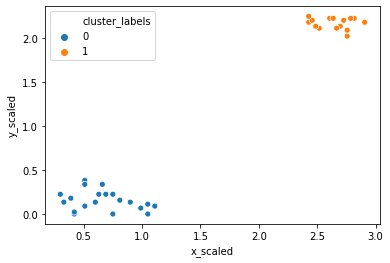

In [8]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

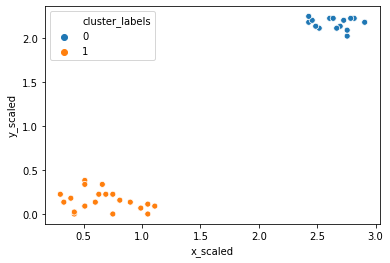

In [9]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# 4. Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like (Source).

In [10]:
#Please download the mouse data later
#https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655

mouse = comic_con

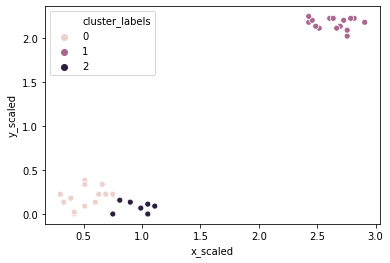

In [11]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans,vq


# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[["x_scaled","y_scaled"]],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[["x_scaled","y_scaled"]],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

# 5. FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

defending: a number which signifies the defending attributes of a player
physical: a number which signifies the physical attributes of a player
These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a Pandas dataframe, fifa. The scaled variables are scaled_def and scaled_phy.

In [14]:
url="https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv"
fifa = pd.read_csv(url)
fifa["scaled_def"] = fifa["def"]/fifa["def"].std()
fifa["scaled_phy"] = fifa["phy"]/fifa["phy"].std()

                scaled_def  scaled_phy
cluster_labels                        
0                 1.947323    7.159652
1                 3.815935    9.015941
2                 2.071767    9.061793


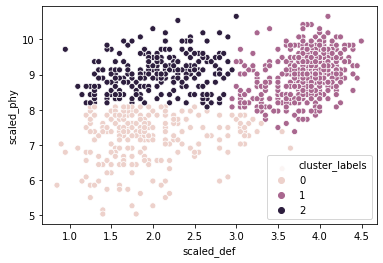

In [15]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x="scaled_def", y="scaled_phy", hue="cluster_labels", data=fifa)
plt.show()